<a href="https://colab.research.google.com/github/bhargav-borah/House-Price-Prediction-Model/blob/main/xgb_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XGB Regression

## Importing the libraries

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the cleaned data set

In [89]:
dataset = pd.read_csv('housing_clean_formatted.csv')

In [90]:
dataset = dataset.drop(columns=['Unnamed: 0'])

## Extracting the Features and the Dependent Variable from the DataFrame

In [91]:
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,median_house_value
0,-122.23,37.88,41,880,129,322,126,8.3252,0,0,1,0,452600
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,0,0,1,0,358500
2,-122.24,37.85,52,1467,190,496,177,7.2574,0,0,1,0,352100
3,-122.25,37.85,52,1274,235,558,219,5.6431,0,0,1,0,341300
4,-122.25,37.85,52,1627,280,565,259,3.8462,0,0,1,0,342200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374,845,330,1.5603,0,1,0,0,78100
20636,-121.21,39.49,18,697,150,356,114,2.5568,0,1,0,0,77100
20637,-121.22,39.43,17,2254,485,1007,433,1.7000,0,1,0,0,92300
20638,-121.32,39.43,18,1860,409,741,349,1.8672,0,1,0,0,84700


In [92]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the data set into the Training set and the Test set

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Training the Model

In [106]:
from xgboost import XGBRegressor
regressor = XGBRegressor(random_state = 0)
regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

## Pedicting the Results

### Training set

In [107]:
y_pred_train = regressor.predict(X_train)
performance_train = pd.DataFrame({'ACTUAL VALUES': y_train, 'PREDICTIONS': y_pred_train})
performance_train

,ACTUAL VALUES,PREDICTIONS
0,381300,371975.750000
1,329300,353251.562500
2,185400,140565.234375
3,500001,473197.375000
4,97500,106844.312500
...,...,...
15475,144600,148150.218750
15476,159400,139418.906250
15477,289300,308434.031250
15478,484600,405877.250000


### Test set

In [108]:
y_pred_test = regressor.predict(X_test)
performance_test = pd.DataFrame({'ACTUAL VALUES': y_test, 'PREDICTIONS': y_pred_test})
performance_test

,ACTUAL VALUES,PREDICTIONS
0,136900,128459.601562
1,241300,264725.750000
2,200700,187116.234375
3,72500,78475.335938
4,460000,420789.750000
...,...,...
5155,121200,122848.914062
5156,137500,200650.484375
5157,160900,206561.953125
5158,227300,229499.765625


## Model Evaluation

In [109]:
from sklearn.metrics import r2_score

### Training set

In [110]:
r_squared_train = r2_score(y_train, y_pred_train)
print('R-squared = ', r_squared_train)

R-squared =  0.9397227355907972


In [111]:
print('Adjusted R-squared = ', 1 - (1-r_squared_train)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

Adjusted R-squared =  0.9395822018482461


### Test set

In [112]:
r_squared_test = r2_score(y_test, y_pred_test)
print('R-squared = ', r2_score(y_test, y_pred_test))

R-squared =  0.8298639590175622


In [113]:
print('Adjusted R-squared = ', 1 - (1-r_squared_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

Adjusted R-squared =  0.8294672944572767


## Visualising the Predictions

### Training set

In [114]:
performance_train['ERROR'] = performance_train['ACTUAL VALUES'] - performance_train['PREDICTIONS']
performance_train.reset_index(drop=True, inplace=True)
performance_train.reset_index(inplace=True)
performance_train

,index,ACTUAL VALUES,PREDICTIONS,ERROR
0,0,381300,371975.750000,9324.250000
1,1,329300,353251.562500,-23951.562500
2,2,185400,140565.234375,44834.765625
3,3,500001,473197.375000,26803.625000
4,4,97500,106844.312500,-9344.312500
...,...,...,...,...
15475,15475,144600,148150.218750,-3550.218750
15476,15476,159400,139418.906250,19981.093750
15477,15477,289300,308434.031250,-19134.031250
15478,15478,484600,405877.250000,78722.750000


<BarContainer object of 15480 artists>

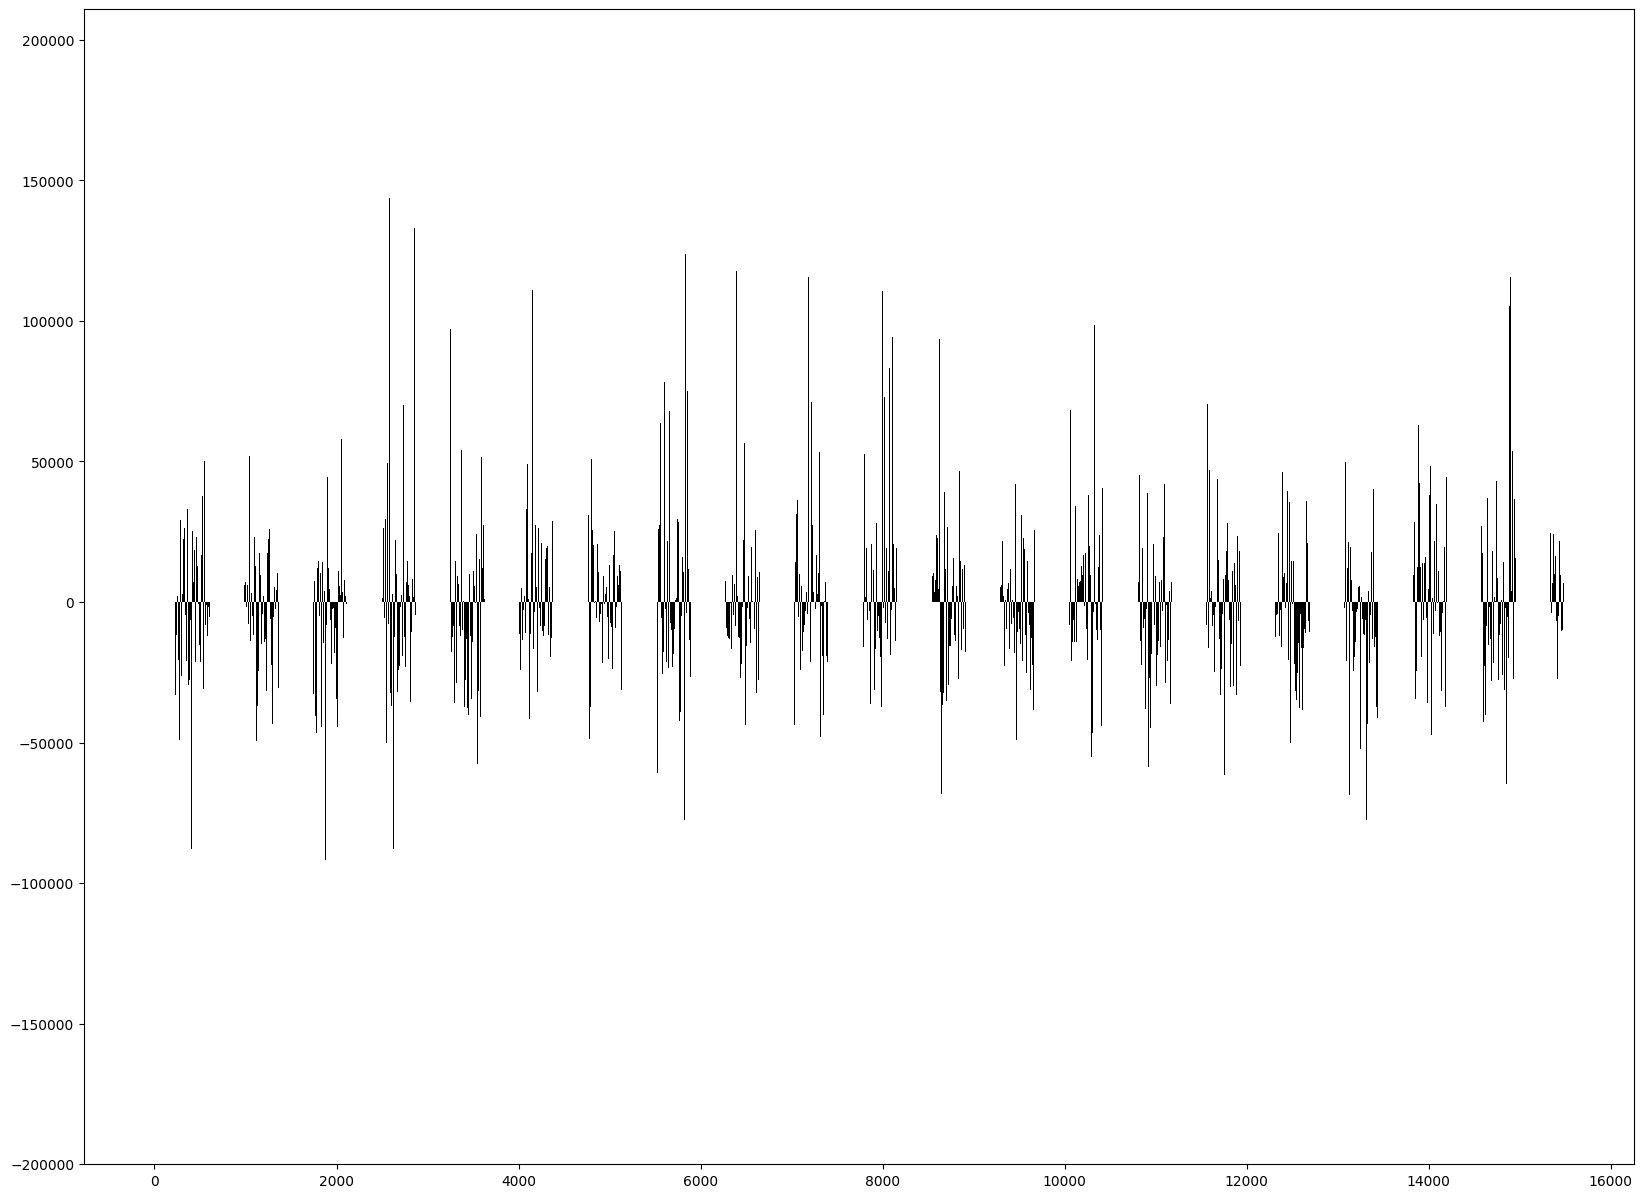

In [115]:
fig = plt.figure(figsize=(20, 15))
plt.bar('index', 'ERROR', data=performance_train, color='black', width=0.5)

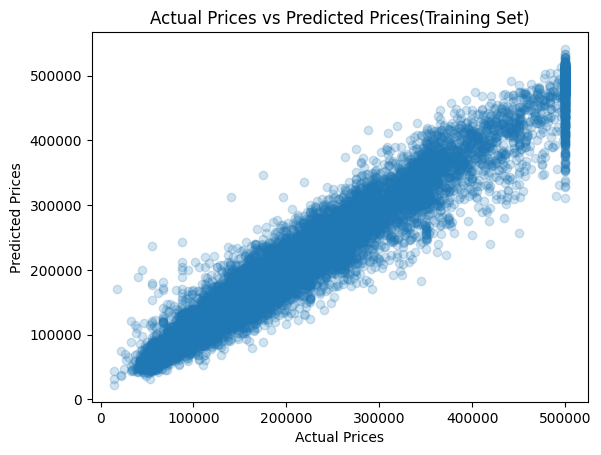

In [116]:
plt.scatter(y_train, y_pred_train, alpha=0.2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices(Training Set)')
plt.show()

### Test set

In [117]:
performance_test['ERROR'] = performance_test['ACTUAL VALUES'] - performance_test['PREDICTIONS']
performance_test.reset_index(drop=True, inplace=True)
performance_test.reset_index(inplace=True)
performance_test

,index,ACTUAL VALUES,PREDICTIONS,ERROR
0,0,136900,128459.601562,8440.398438
1,1,241300,264725.750000,-23425.750000
2,2,200700,187116.234375,13583.765625
3,3,72500,78475.335938,-5975.335938
4,4,460000,420789.750000,39210.250000
...,...,...,...,...
5155,5155,121200,122848.914062,-1648.914062
5156,5156,137500,200650.484375,-63150.484375
5157,5157,160900,206561.953125,-45661.953125
5158,5158,227300,229499.765625,-2199.765625


<BarContainer object of 5160 artists>

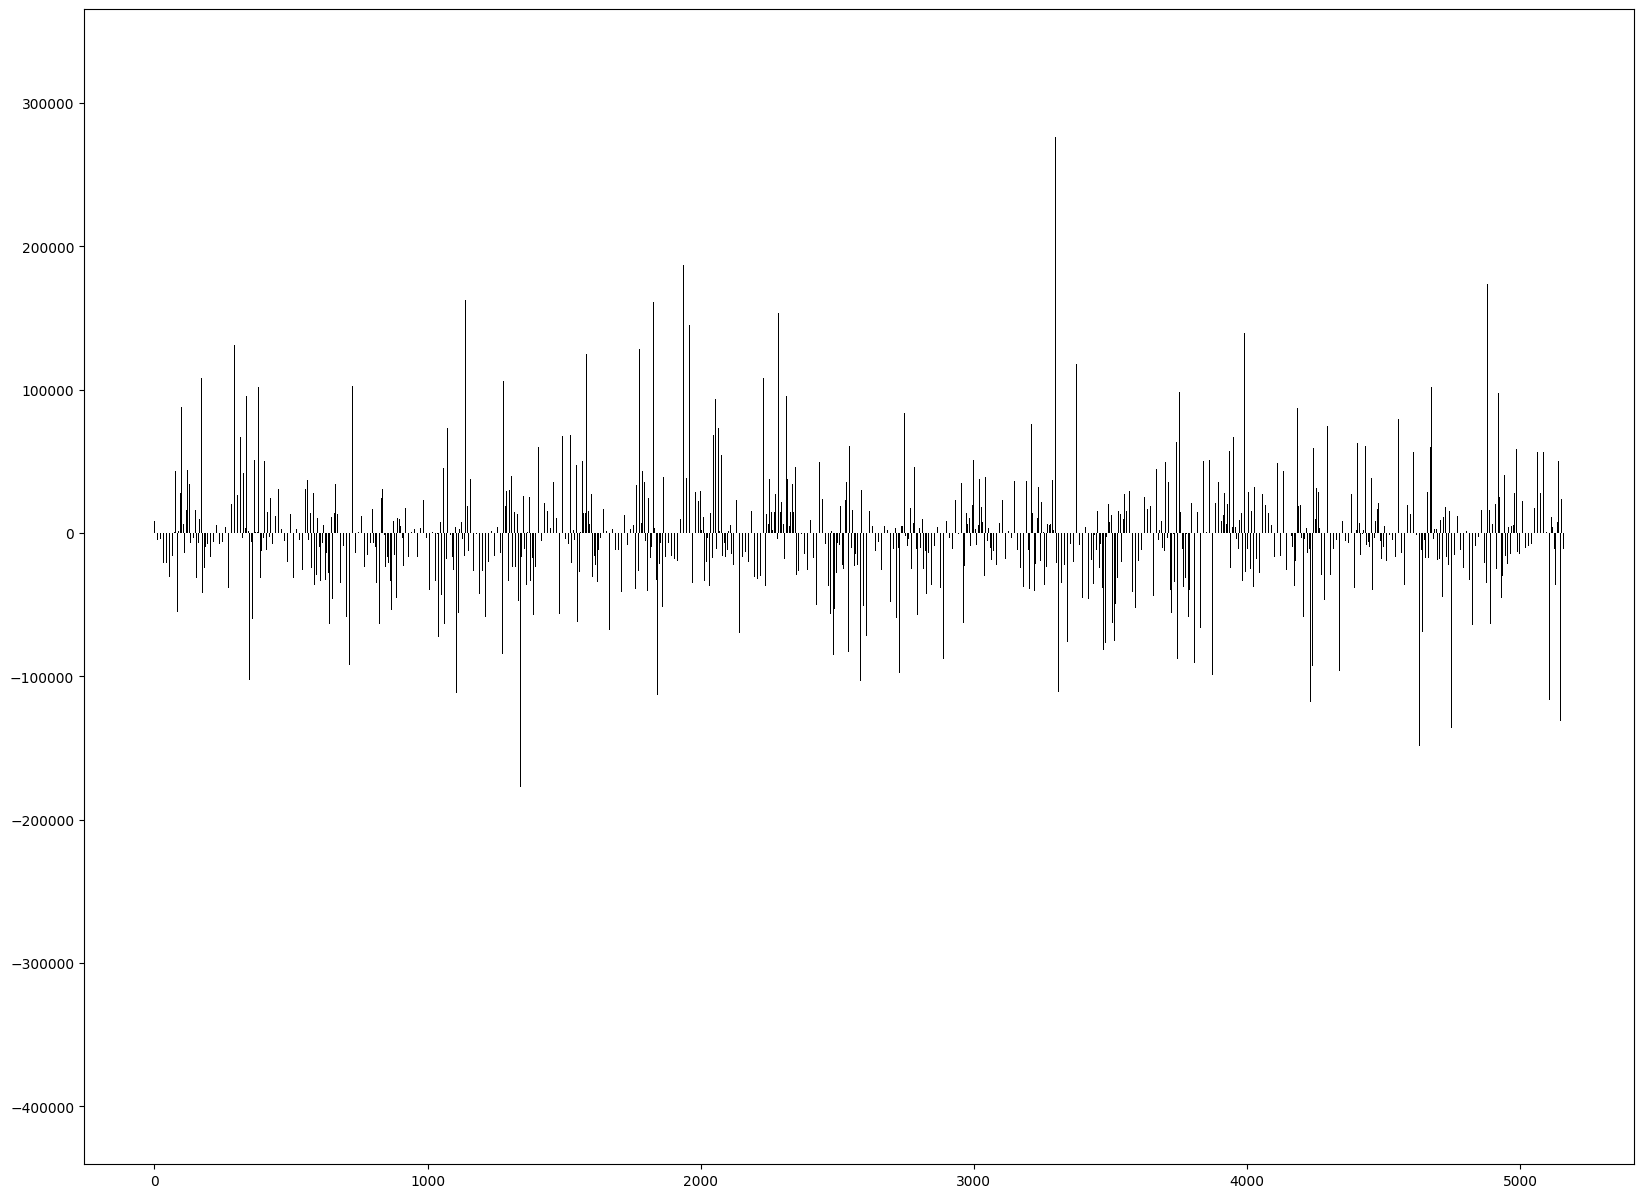

In [118]:
fig = plt.figure(figsize=(20, 15))
plt.bar('index', 'ERROR', data=performance_test, color='black', width=0.5)

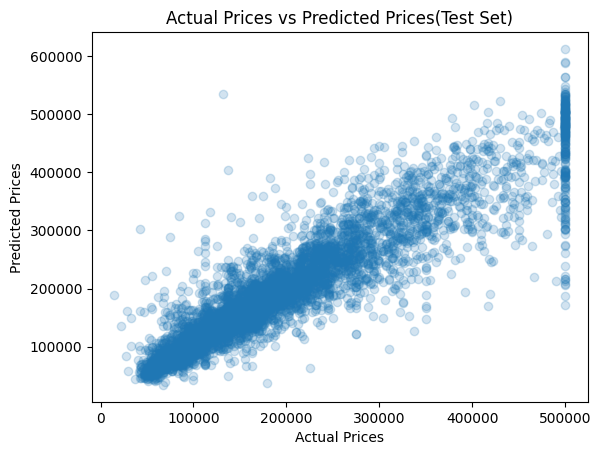

In [119]:
plt.scatter(y_test, y_pred_test, alpha=0.2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices(Test Set)')
plt.show()